## SpotiPy-Wrapped
#### By: Patrick D
### Usage Instructions:
1) Request your personal data from Spotify:  spotify.com -> my profile -> privacy -> request personal data -> wait a few days  
2) Unzip files into the input folder within this directory  
3) Change the 'directory' variable to point to your folder  
4) Run the notebook  
5) Change input variables of functions to get more specific information  

Note: Unless otherwise specified the timeframe for any given function/plot will be the oldest date found in your data

Spotify Wrapped normally goes from 01/01 to 10/30 if you want to try and preview what your wrapped will look like

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import os.path
from pathlib import Path 
import time
import datetime

from notebook_funcs.cleaner import *
from notebook_funcs.helper import *
from notebook_funcs.live import *

### Data Cleaning

In [2]:
## Import live logged playback info
#his = read_logs()
#his

In [3]:
# create listening history dataframe from desired directory within input folder
print(os.getcwd())
directory = Path('input/20221105') # change this to '/input/your-directory-name'
his = read_history(directory)

# uncomment this if you want your dataframe output as a csv (change end of directory to your desired one)
#his.to_csv('input/20221012/his.csv', index = False)

/home/patrick/Documents/projects/SpotiPy-Wrapped
Files Included: 6 

Unique Values:
endTime       46370
artistName     2183
trackName      5924
msPlayed      13831
dtype: int64


In [4]:
skipped = sort_skipped(his)
unskipped = sort_unskipped(his)

tracks = get_tracks(unskipped)
artists = get_artists(unskipped)

/home/patrick/Documents/projects/SpotiPy-Wrapped/notebook_funcs/cleaner.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unskipped['endTime'] = pd.to_datetime(unskipped['endTime']) # WARNING:


### Graphs

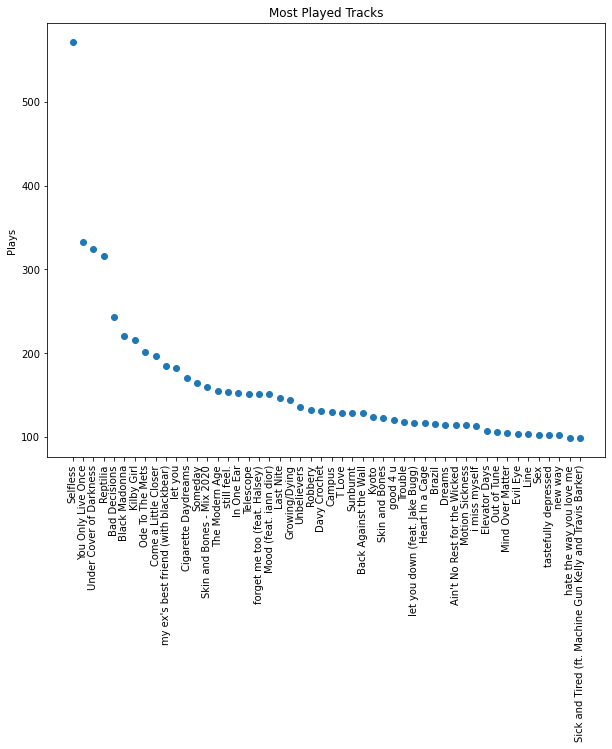

In [5]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(tracks.head(50), 'o')
plt.xticks(rotation = 90)
plt.title('Most Played Tracks')
plt.ylabel('Plays')
plt.show()

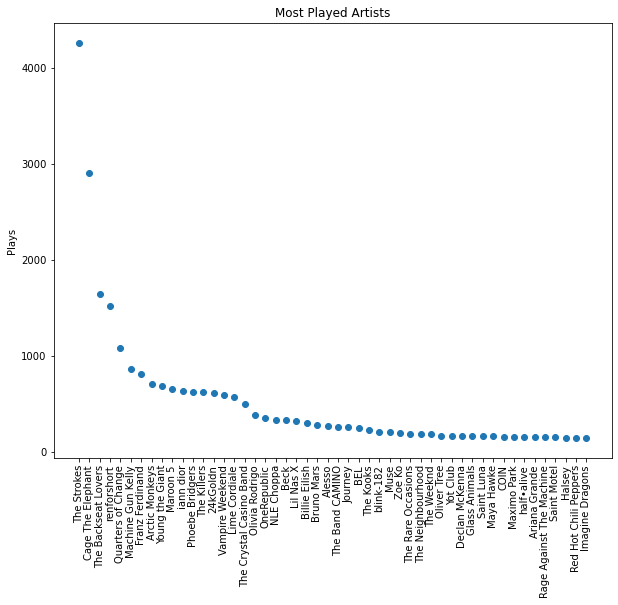

In [6]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(artists.head(50), 'o')
plt.xticks(rotation = 90)
plt.title('Most Played Artists')
plt.ylabel('Plays')
plt.show()

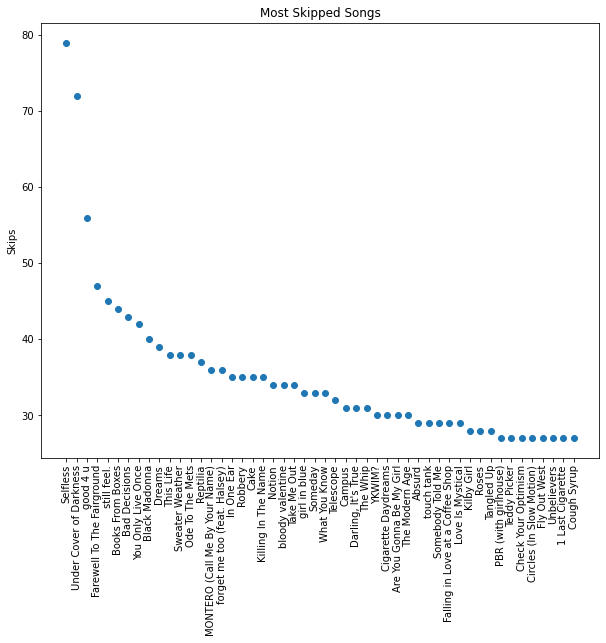

In [7]:
skipped_tracks = skipped['trackName'].value_counts()
plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(skipped_tracks.head(50), 'o')
plt.xticks(rotation = 90)
plt.title('Most Skipped Songs')
plt.ylabel('Skips')
plt.show()

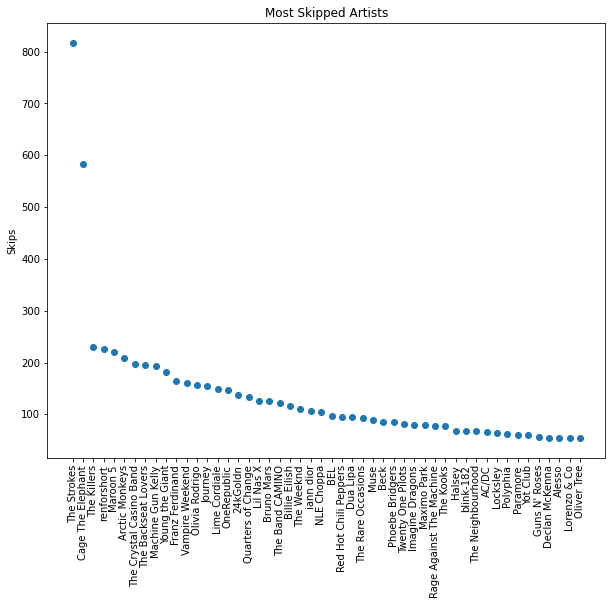

In [8]:
skipped_artists = skipped['artistName'].value_counts()
plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(skipped_artists.head(50), 'o')
plt.xticks(rotation = 90)
plt.title('Most Skipped Artists')
plt.ylabel('Skips')
plt.show()

### Playtime

In [9]:
# Get playtime
t = playtime(unskipped)

Total minutes listened: 153939
Total hours listened: 2565.65


### Artist/Song specific information

In [10]:
artist = 'Cage The Elephant' # change this to an artist of your choice (case sensitive)
temp = artistPlayCount(artist)

You have listened to Cage The Elephant 
 endTime       2896
artistName       1
trackName       79
msPlayed       346
dtype: int64 times.


In [11]:
track = "Kilby Girl" # change this to a song name of your choice (case sensitive)
temp = songPlayCount(track)

You have listened to Kilby Girl 
 endTime       215
artistName      1
trackName       1
msPlayed       26
dtype: int64 times.


### Timeframe specific information

In [12]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe_lower = '2022-01-01' # change this - lower bound
timeframe_upper = '2022-10-30' # change this - upper bound
topArtistsTimeframeBounded(timeframe_lower, timeframe_upper, 10)

The Strokes            2827
Cage The Elephant      1982
The Backseat Lovers    1546
renforshort            1487
Quarters of Change     1059
Franz Ferdinand         749
iann dior               635
24kGoldn                613
Phoebe Bridgers         605
Vampire Weekend         576
Name: artistName, dtype: int64

In [13]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe_lower = '2022-01-01' # change this - lower bound
timeframe_upper = '2022-10-31' # change this - upper bound
topSongsTimeframeBounded(timeframe_lower, timeframe_upper, 10)

Selfless                   410
Under Cover of Darkness    219
Reptilia                   215
Kilby Girl                 214
You Only Live Once         199
let you                    182
Bad Decisions              164
Mood (feat. iann dior)     151
Come a Little Closer       151
Cigarette Daydreams        144
Name: trackName, dtype: int64

In [14]:
# This one is a work in process, doesn't work for all months

# Get listening time for a given month
# inputs - month number and year
month = 8
year = 2022 
listeningTimeMonth(month, year)

197.53819333333334

In [15]:
# Get listening time for a given artist in hours
# Change artist name
artist = 'Quarters of Change'
listeningTimeArtist(artist)

72.16971916666667